# Part II - (Used Cars Pricing Determinants)
## by (Olujemibola Oluwasegun)

## Investigation Overview
In this investigation, I'm looking at the features of used cars that is significant to  the pricing of  the used cars. 

## Dataset Overview
The dataset contains data of  7901 used cars, each with 18 features like, the selling price, no of seats, km driven, engine power,max power and several other features

In [14]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline
base_color = sns.color_palette()[0]

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [15]:
# load in the dataset into a pandas dataframe
car_df = pd.read_csv('datasets/UserCarData.csv')

## Distribution of used car prices
The prices in the dataset take a very large range of values. From about 30,000 to 10,000,000.
When plotted on a logarithmic scale the distribuion is fairly right skewed.The contains few high values,the highest price is 10 million owned by a single car. Less than 9% of car prices are above 1 million. Most car prices are between 200,000 and 600,000

In [16]:
def log_trans(x,inverse=False):
    """converts to log10 base if inverse is false and vice versa"""
    if inverse:
        return (10 ** x).astype(int)
    else:
        return np.log10(x)

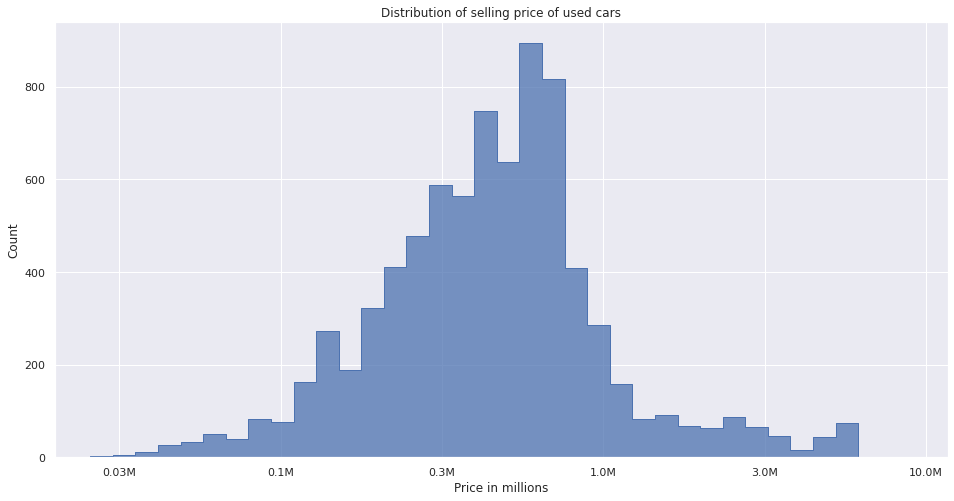

In [17]:
selling_price=log_trans(car_df.selling_price)
bins = np.arange(4.2,7.0,0.07)
selling_price=log_trans(car_df.selling_price)
plt.figure(figsize=[16,8])
sns.histplot(x=selling_price,bins=bins,element='step');
x_ticks = np.array([3.0,4.5,5.0,5.5,6.0,6.5,7.0])
ticks = [10000,30000,100000,300000,1000000,3000000,10000000]
labels = [str(t/1000000)+"M" for t in ticks]
plt.xticks(x_ticks,labels);
plt.xlim(4.3)
plt.xlabel('Price in millions')
plt.ylabel('Count')
plt.title('Distribution of selling price of used cars');

## Distribution of maximum engine power(max_power)
The maximum power distribuion is right skewed most values falling between 50 and 300. It is a unimodal distribution.

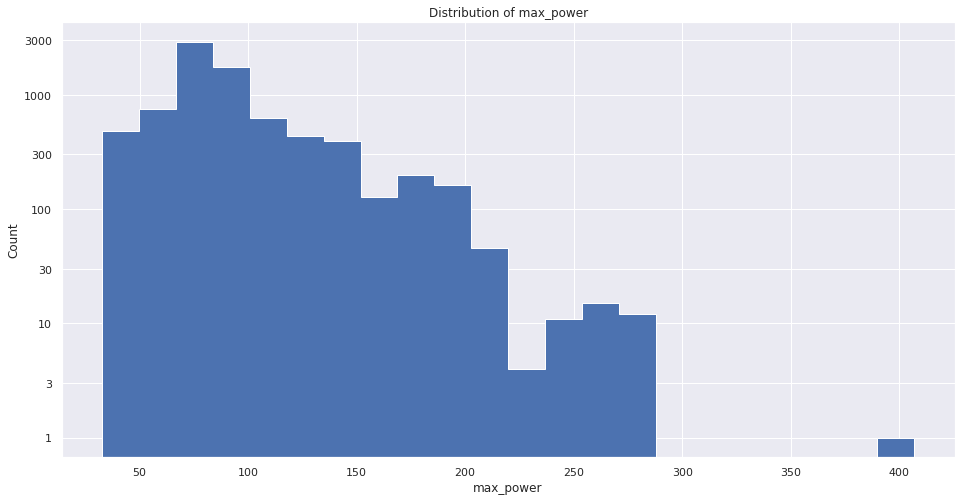

In [18]:
bins = np.arange(car_df.max_power.min(),car_df.max_power.max()+10,17)
plt.figure(figsize=[16,8])
plt.hist('max_power',data=car_df,bins=bins,histtype='stepfilled')
plt.yscale('log')
ticks = [1,3,10,30,100,300,1000,3000]
labels = [str(t) for t in ticks]
plt.yticks(ticks,labels);
plt.ylabel('Count')
plt.xlabel('max_power')
plt.title('Distribution of max_power');

## Price vs Max power
Plotting price(selling price) on a logarithmic scale vs max power produces an apporximately linear relationship.<br>
As price increases gently as max_power increases. The change is more noticable after 0.3M(300,000),price rises more clearly with increase in max_power.

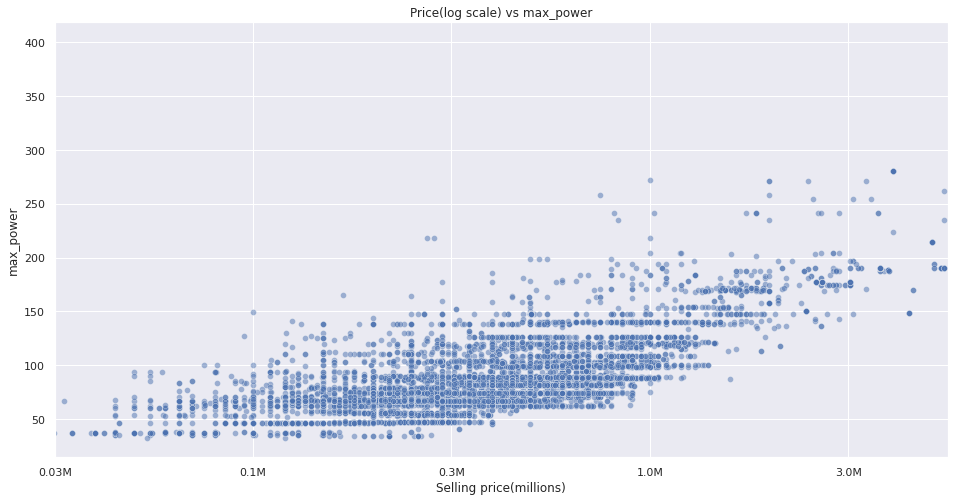

In [19]:
# let's apply log tranformation to the selling price
selling_price=log_trans(car_df.selling_price)
plt.figure(figsize=[16,8])
sns.scatterplot(x=selling_price,y=car_df.max_power,alpha=1/2,)
x_ticks = np.array([3.0,4.5,5.0,5.5,6.0,6.5,7.0])
ticks = [10000,30000,100000,300000,1000000,3000000,10000000]
labels = [str(t/1000000)+"M" for t in ticks]
plt.xticks(x_ticks,labels);
plt.xlim((4.5,6.75))
plt.xlabel('Selling price(millions)')
plt.title('Price(log scale) vs max_power');

## Price by categorical variables
Price by the following categorical variables; Transmission,owner,seller type and fuel.The visualization produces some interesting insights. The median price reduces as the number of owners increase.Diesel cars cost more than Petrol cars. Automatic are cost more than manual cars.The individual median is lower compared to dealers and trustmard dealers,I guess the dealers are better negotiators. The median price is the same for all regions

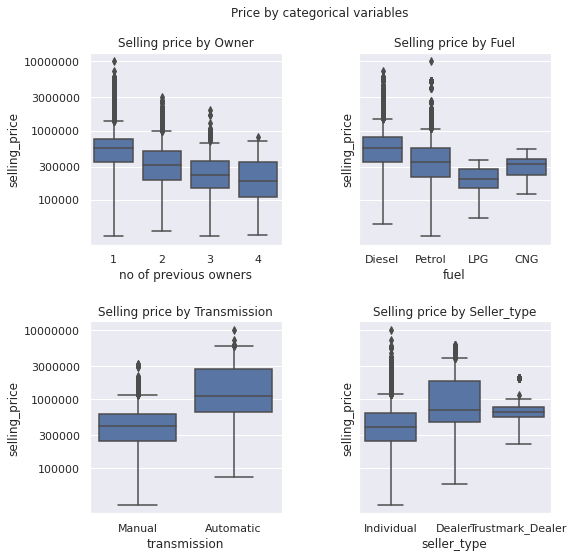

In [20]:
categorical_variables = ['owner','fuel','transmission','seller_type']
fig,axs = plt.subplots(2,2,sharey=True)
fig.set_figheight(8)
fig.set_figwidth(8)
axes = axs[0,0],axs[0,1],axs[1,0],axs[1,1]
index = 0
for var in categorical_variables:
    g = sns.boxplot(x=var,y='selling_price',data=car_df,ax=axes[index],color=base_color)
    g.set_yscale('log')
    if var == 'owner':
        g.set_xticklabels(['1','2','3','4'],)
        g.set_xlabel('no of previous owners')
    g.set(yticks=[100000,300000,1000000,3000000,10000000])
    g.set_yticklabels([100000,300000,1000000,3000000,10000000])
    g.set_title(f'Selling price by {var.capitalize()}')
    index +=1
plt.subplots_adjust(left=0.1,
                   bottom=0.1,
                   right=0.9,
                   top=0.9,
                   wspace=0.4,
                   hspace=0.4)
plt.suptitle('Price by categorical variables');

## Price by Transmission and No of owners
The mean price for used cars generally decreased as the no of previous owners increased.We can also observe a difference in prices of Manual and Automatic cars. Automatic car we of much higher prices compared to manual.

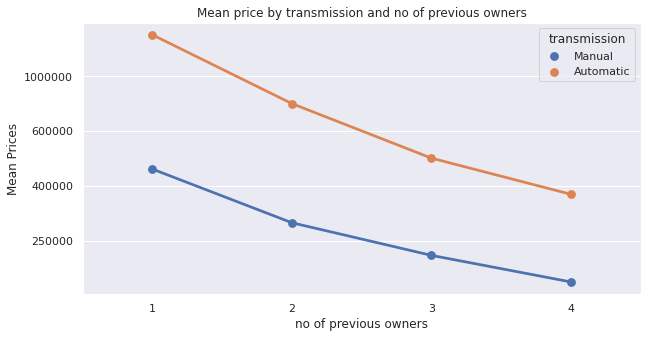

In [21]:
fig,axs = plt.subplots(ncols=1,figsize=[10,5])
sns.pointplot(y=selling_price,x=car_df['owner'],hue=car_df['transmission'],ax=axs,ci=None,estimator=lambda x:np.mean(x))
axs.set(yticks=[5.4,5.6,5.8,6.0])
axs.set_yticklabels([250000,400000,600000,1000000])
axs.set_xticklabels([1,2,3,4])
axs.set_xlabel('no of previous owners')
axs.set_title("Mean price by transmission and no of previous owners")
axs.set_ylabel('Mean Prices');

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 835482 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
